In [38]:
# clear memory
%reset -f

In [39]:
import numpy as np
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data as Dask DataFrame

In [40]:
%%time
# import data as dask dataframe
cleaned_df = dd.read_csv('..\\data\\cleaned\\cleaned_taxi_data.csv')

cleaned_df.compute().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7469656 entries, 0 to 164290
Data columns (total 22 columns):
 #   Column           Dtype  
---  ------           -----  
 0   booking_id       int64  
 1   name             object 
 2   driver_age       int64  
 3   gender           object 
 4   car_model        object 
 5   car_make_year    int64  
 6   accuracy         float64
 7   direction        object 
 8   acceleration_x   float64
 9   acceleration_y   float64
 10  acceleration_z   float64
 11  MA (m/s^2)       float64
 12  gyro_x           float64
 13  gyro_y           float64
 14  gyro_z           float64
 15  MAV (rad/s)      float64
 16  second           float64
 17  duration (mins)  float64
 18  speed (km/h)     float64
 19  speed            float64
 20  rating           float64
 21  safety_label     int64  
dtypes: float64(14), int64(4), object(4)
memory usage: 1.3+ GB
CPU times: total: 26.1 s
Wall time: 9.53 s


In [41]:
cleaned_df.compute().head()

,booking_id,name,driver_age,gender,car_model,car_make_year,accuracy,direction,acceleration_x,acceleration_y,...,gyro_x,gyro_y,gyro_z,MAV (rad/s),second,duration (mins),speed (km/h),speed,rating,safety_label
0,0,Lilia,48,Male,Mercedes-Benz,2013,8.0,South East,-1.706207,-9.270792,...,-0.028965,-0.032652,0.015390,0.046282,2.0,0.03,0.822436,0.228454,4.0,0
1,0,Lilia,48,Male,Mercedes-Benz,2013,8.0,South East,-1.416705,-9.548032,...,-0.022413,0.005049,-0.025753,0.034511,3.0,0.05,0.822436,0.228454,4.0,0
2,0,Lilia,48,Male,Mercedes-Benz,2013,8.0,South East,-0.346924,-9.532629,...,0.014962,-0.050033,0.025118,0.057949,9.0,0.15,0.822436,0.228454,4.0,0
3,0,Lilia,48,Male,Mercedes-Benz,2013,8.0,South East,-0.600986,-9.452029,...,0.004548,-0.011713,-0.004078,0.013210,11.0,0.18,0.822436,0.228454,4.0,0
4,0,Lilia,48,Male,Mercedes-Benz,2013,8.0,South East,-0.597546,-9.863403,...,-0.000401,0.000315,-0.009830,0.009843,12.0,0.20,0.822436,0.228454,4.0,0


# Change Datatypes for lower memory usage

In [42]:
# change columns to category datatype
cleaned_df['safety_label'] = cleaned_df['safety_label'].astype('category')
cleaned_df['direction'] = cleaned_df['direction'].astype('category')
cleaned_df['gender'] = cleaned_df['gender'].astype('category')
cleaned_df['car_model'] = cleaned_df['car_model'].astype('category')

# change driver age to int8
cleaned_df['driver_age'] = cleaned_df['driver_age'].astype('int8')

# change car_make_year to int16
cleaned_df['car_make_year'] = cleaned_df['car_make_year'].astype('int16')

# change rating to float16
cleaned_df['rating'] = cleaned_df['rating'].astype('float16')
cleaned_df['rating'] = cleaned_df['rating'].astype('float16')

# change booking_id to object
cleaned_df['booking_id'] = cleaned_df['booking_id'].astype('object')

In [43]:
# check memory usage and new datatypes
cleaned_df.compute().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7469656 entries, 0 to 164290
Data columns (total 22 columns):
 #   Column           Dtype   
---  ------           -----   
 0   booking_id       object  
 1   name             object  
 2   driver_age       int8    
 3   gender           category
 4   car_model        category
 5   car_make_year    int16   
 6   accuracy         float64 
 7   direction        category
 8   acceleration_x   float64 
 9   acceleration_y   float64 
 10  acceleration_z   float64 
 11  MA (m/s^2)       float64 
 12  gyro_x           float64 
 13  gyro_y           float64 
 14  gyro_z           float64 
 15  MAV (rad/s)      float64 
 16  second           float64 
 17  duration (mins)  float64 
 18  speed (km/h)     float64 
 19  speed            float64 
 20  rating           float16 
 21  safety_label     category
dtypes: category(4), float16(1), float64(13), int16(1), int8(1), object(2)
memory usage: 975.9+ MB


# Get Numerical columns only

In [44]:
# get column names where datatype is numerical
num_cols = cleaned_df.select_dtypes(include=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns
num_cols

Index(['driver_age', 'car_make_year', 'accuracy', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'MA (m/s^2)', 'gyro_x', 'gyro_y',
       'gyro_z', 'MAV (rad/s)', 'second', 'duration (mins)', 'speed (km/h)',
       'speed', 'rating'],
      dtype='object')

In [45]:
# exclude driver_age, car_make_year, rating, second, speed
num_cols = num_cols.drop(['driver_age', 'car_make_year', 'rating', 'second', 'speed'])
num_cols

Index(['accuracy', 'acceleration_x', 'acceleration_y', 'acceleration_z',
       'MA (m/s^2)', 'gyro_x', 'gyro_y', 'gyro_z', 'MAV (rad/s)',
       'duration (mins)', 'speed (km/h)'],
      dtype='object')

# Histograms to see distribution of numerical data

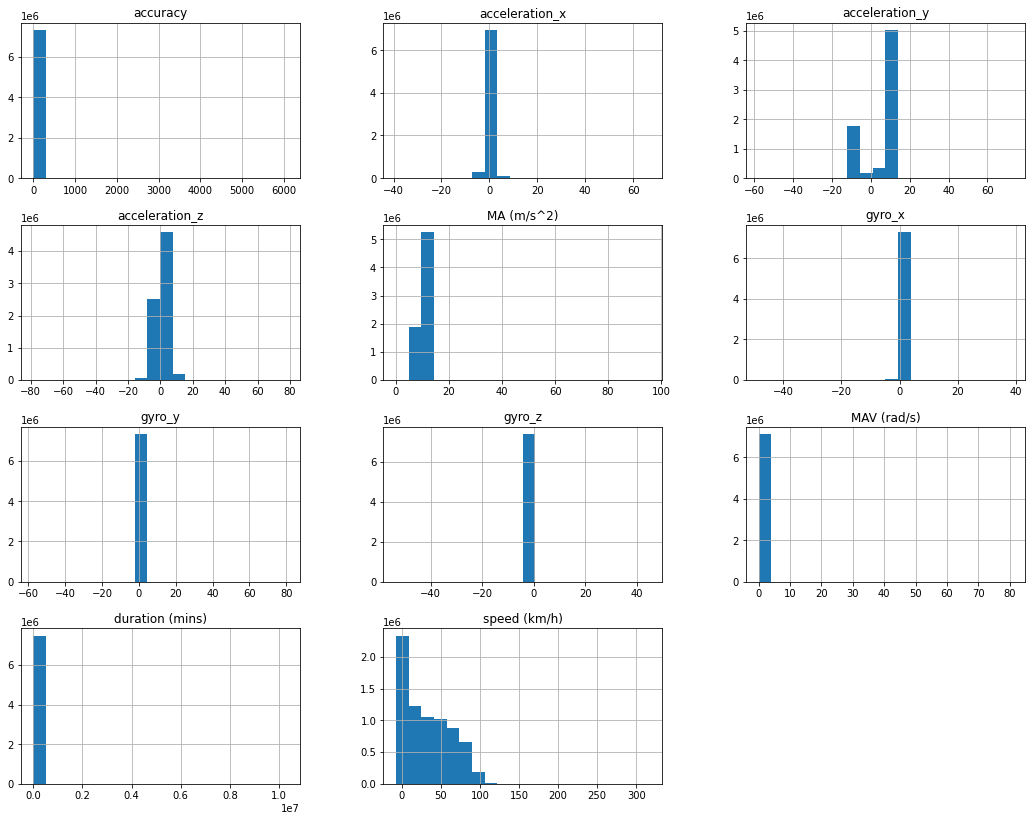

In [46]:
# plot histograms for numerical columns
cleaned_df[num_cols].compute().hist(figsize=(18,14), bins=20)
plt.show()

**Observations**
Seems to have outliers for everything, boxplot needs to be plotted to find out more

# Boxplots of numerical data

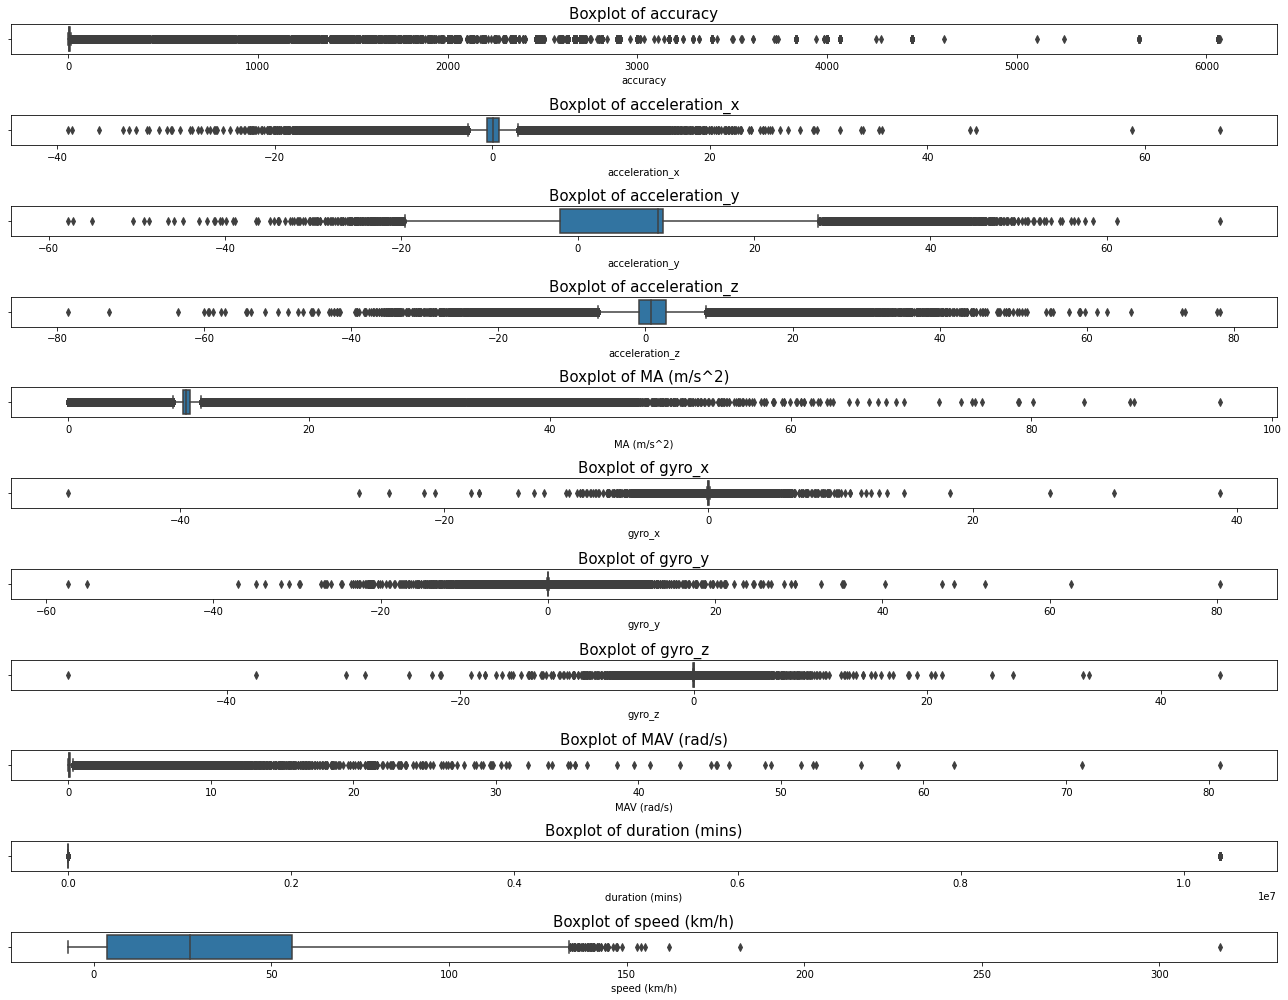

CPU times: total: 5min 59s
Wall time: 2min 16s


In [47]:
%%time
# boxplots of numerical data
plt.figure(figsize=(18,14))
for i, col in enumerate(num_cols):
    plt.subplot(11,1,i+1)
    sns.boxplot(x=col, data=cleaned_df[num_cols].compute())
    plt.title(f"Boxplot of {col}", fontsize=15)
    plt.tight_layout()
plt.show()

**Observations**

* There are outliers in all the numerical columns
* For `accuracy` and `speed (km/h)`, the outliers are completely normal and should not be dealt with
* The other columns have outliers which are not normal and require further analysis

# Outlier Analysis

## Outlier Analysis on ride time
A outlier in the `ride time` column is a ride which exceeds 24 hours. This is not possible and hence should be removed

In [48]:
# boolean mask to get data where ride time is greater than 720 mins (12 hours)
bool_mask = cleaned_df['duration (mins)'] > 720

In [49]:
# get number of rows in sensor data using boolean mask
print(f"Number of rows in sensor data where ride time > 12 hours: {cleaned_df[bool_mask].compute().shape[0]}")

# get number of unique booking ids using boolean mask
print(f"Number of unique rides where ride time > 12 hours: {cleaned_df[bool_mask].compute()['booking_id'].nunique()}")

Number of rows in sensor data where ride time > 12 hours: 37
Number of unique rides where ride time > 12 hours: 4


In [50]:
# get the percentages of ride time outliers in the dataset
print(f"Percentage of sensor data where ride time > 12 hours: {cleaned_df[bool_mask].compute().shape[0] / cleaned_df.compute().shape[0] * 100}%")
print(f"Percentage of unique rides where ride time > 12 hours: {cleaned_df[bool_mask].compute()['booking_id'].nunique() / cleaned_df.compute()['booking_id'].nunique() * 100}%")

Percentage of sensor data where ride time > 12 hours: 0.0004953374024185316%
Percentage of unique rides where ride time > 12 hours: 0.02%


**Counts of sensor logs for each booking id where the ride exceeds 12 hours**

In [51]:
cleaned_df[bool_mask].compute()['booking_id'].value_counts()

858993459333     23
1460288880770    11
1434519076976     2
1108101562401     1
Name: booking_id, dtype: int64

**Observations**
* There are only 4 unique rides where ride time is greater than 12 hours, which logged a combined total of 37 rows by the sensors. 
* A reason for these values may be that the sensors were not able to detect the ride ending and hence logged the ride as still in progress, or that the drivers forgot to end the ride.
* The 37 rows will be removed from the dataset as they make up less than 0.001% of the sensors dataset.

In [52]:
# Drop rows where ride time is greater than 720 mins (12 hours) using boolean masking
cleaned_df = cleaned_df[cleaned_df['duration (mins)'] <= 720]
cleaned_df.compute().shape

(7469619, 22)

**Distribution of ride time after removing ride time outliers**

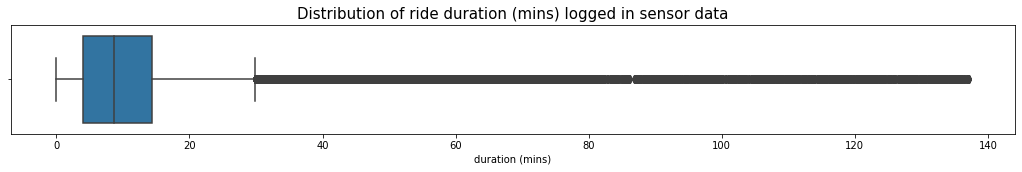

In [53]:
# boxplot of ride time after removing outliers
plt.figure(figsize=(18,2))
sns.boxplot(x=cleaned_df['duration (mins)'].compute())
plt.title(f"Distribution of ride duration (mins) logged in sensor data", fontsize=15)
plt.show()

## Outlier Analysis on accelerometer data
I would define a outlier as a driver exceeding 2 G-Forces, which is calculated from the accelerometer data.

A G-Force is a unit of acceleration equal to the acceleration of gravity. 1 G-Force is equal to 9.81 m/s^2.

To calculate the G-Force, the following formula is used:
g_force = magnitude of acceleration / 9.81

In [54]:
# boolean mask to get data where rows where G-Force > 2
g_force_bool_mask = cleaned_df['MA (m/s^2)'] / 9.81 > 2

In [62]:
# get number of rows in sensor data where G-Force > 2 using boolean mask
print(f"Number of rows in sensor data where G-Force > 2: {cleaned_df[g_force_bool_mask].compute().shape[0]}")

# get number of unique booking ids where G-Force > 2 using boolean mask
print(f"Number of unique rides where G-Force > 2: {cleaned_df[g_force_bool_mask].compute()['booking_id'].nunique()}")

Number of rows in sensor data where G-Force > 2: 10261
Number of unique rides where G-Force > 2: 524


In [56]:
# get the percentages of G-Force outliers in the dataset
print(f"Percentage of sensor data where G-Force > 2: {cleaned_df[g_force_bool_mask].compute().shape[0] / cleaned_df.compute().shape[0] * 100}%")
print(f"Percentage of unique rides where G-Force > 2: {cleaned_df[g_force_bool_mask].compute()['booking_id'].nunique() / cleaned_df.compute()['booking_id'].nunique() * 100}%")

Percentage of sensor data where G-Force > 2: 0.1373697908822391%
Percentage of unique rides where G-Force > 2: 2.62%


In [57]:
# percentage per booking id where G-Force > 2 for each booking id that has above 2 g-force
cleaned_df[g_force_bool_mask].compute()['booking_id'].value_counts()

1365799600293    727
1125281431597    690
292057776256     600
764504178695     596
34359738418      463
                ... 
223338299490       1
223338299446       1
214748364920       1
206158430209       1
996432412808       1
Name: booking_id, Length: 524, dtype: int64

**Observations**

There are 10261 sensor logs which have a G-Force greater than 2. This is 0.137% of the total sensor logs. This also affects 524 unique rides, which is 2.62% of the total number of rides in this dataset, the rows will hence be removed from the dataset

In [61]:
cleaned_df.compute().shape

(7469619, 22)

In [ ]:
# drop rows where G-Force > 2
cleaned_df = cleaned_df[cleaned_df['MA (m/s^2)'] / 9.81 <= 2]

In [63]:
cleaned_df[cleaned_df['MA (m/s^2)'] / 9.81 <= 2].compute().shape

(7137717, 22)

In [60]:
cleaned_df[cleaned_df['MA (m/s^2)'] / 9.81 > 2].compute().shape

(10261, 22)

In [37]:
# Drop rows where G-Force > 2 using boolean masking
# cleaned_df = cleaned_df[cleaned_df['MA (m/s^2)'] / 9.81 <= 2]
# cleaned_df.compute().shape

(7137717, 22)

**Boxplots After Removing Outliers**

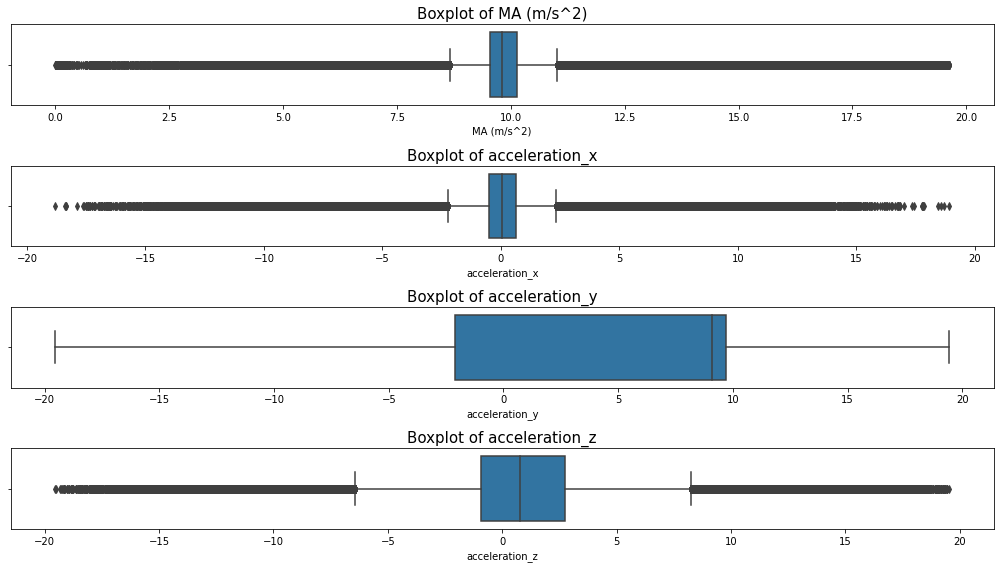

In [64]:
# boxplot of accelerometer data after removing outliers
plt.figure(figsize=(14,8))
accelerometer_columns = ['MA (m/s^2)', 'acceleration_x', 'acceleration_y', 'acceleration_z']
for i, col in enumerate(accelerometer_columns):
    plt.subplot(4,1,i+1)
    sns.boxplot(x=col, data=cleaned_df[accelerometer_columns].compute())
    plt.title(f"Boxplot of {col}", fontsize=15)
    plt.tight_layout()
plt.show()

## Outlier Analysis on gyroscope data

In [ ]:
# boolean mask to get data where rows where G-Force > 2
g_force_bool_mask = cleaned_df['MA (m/s^2)'] / 9.81 > 2

**Observations**